In [ ]:
%load_ext autoreload
%autoreload 2

import os
import sys
import data
import plotly.express as px
import pandas   as pd


In [ ]:
path = r"C:\Users\lnae0002\Desktop\autolamella\autolamella\log\3"

df_sample, df_history, df_shift, df_steps  = data.calculate_statistics_dataframe(path)
display(df_shift)

In [ ]:
points = pd.DataFrame(df_shift["shift"].tolist(), columns=["x", "y"])
points["lamella"] = df_shift["lamella"]
fig = px.scatter(points, x="x", y='y', color="lamella")
fig.show()

In [ ]:
display(df_steps)
fig = px.scatter(df_steps, x="step_n", y="timestamp", color="stage", symbol='lamella')
fig.show()



In [ ]:
# calculate difference in timestamp between rows
df_steps['delta'] = df_steps['timestamp'].diff()

display(df_steps)

px.bar(df_steps, x="lamella", y="delta", color="step", facet_col="stage")

In [ ]:
fig = px.bar(df_history, x="stage", y="duration", color="petname", barmode="group")

fig.show()

In [ ]:
# display(df_history)
df_history["duration"].mean()

df_sorted = df_history.groupby(["stage", "petname"]).mean()
df_sorted.drop(columns=["start", "end"], inplace=True)
df_sorted.reset_index(inplace=True)
display(df_sorted)


In [ ]:
points = pd.DataFrame(df_sample["lamella.centre"].tolist(), columns=["x", "y"])
points["petname"] = df_history["petname"].unique()
display(points)
fig = px.scatter(points, x="x", y='y', color="petname")
fig.show()

In [ ]:
df_sample["petname"] = df_history["petname"].unique()
fig = px.scatter_3d(df_sample, x="lamella.x", y='lamella.y', z='lamella.z', color="petname")
fig.show()

### SpaceTOMO

In [ ]:

from PIL import Image
import tifffile as tff
import glob



PATH = "../../../data/spacetomo/imagesTr/"


filenames = glob.glob(PATH + "*.png")

from pprint import pprint

# pprint(filenames)

# convert to tiff, save in separate dir   
for filename in filenames:
    im = Image.open(filename)
    im.save(filename.replace(".png", ".tif"))


### Feature Detection Tools



In [ ]:
%load_ext autoreload
%autoreload 2

import os
import glob
import pandas as pd



path = "../../../data/autolamella-paper/model-development/train/serial-liftout/test/"

filenames = sorted(glob.glob(os.path.join(path, "*.tif*")))


print(df.head())

In [ ]:
df = pd.read_csv(os.path.join(path, "data.csv"))

display(df.head())

filenames = []
for fname in df["filename"].values:
    filenames += glob.glob(os.path.join(path, f"*{fname}*"))

print(len(filenames))

from pprint import pprint
pprint(filenames)


In [ ]:
df = pd.read_csv(os.path.join(path, "data.csv"))


fname = df["filename"].values[0]

df_filt = df[df["filename"] == fname]


display(df)

# drop rows with filename = fname
df.drop(df[df["filename"] == fname].index, inplace=True)

display(df)

### Get / Set API

In [ ]:
%load_ext autoreload
%autoreload 2


from fibsem import utils, acquire
from fibsem.structures import BeamType
import matplotlib.pyplot as plt

import matplotlib
%matplotlib inline

microscope, settings = utils.setup_session(debug=True)

print('--'*50)
microscope.apply_configuration()

print('--'*50)
eb = microscope.get_beam_system_settings(BeamType.ELECTRON)
ib = microscope.get_beam_system_settings(BeamType.ION)



### Export Milling Protocol

In [ ]:
%load_ext autoreload
%autoreload 2


from fibsem.structures import BeamType
from fibsem import utils, patterning

microscope, settings = utils.setup_session(protocol_path="../../autolamella/protocol/protocol-serial-liftout.yaml", debug=True)

In [ ]:
stages = patterning.get_milling_stages("trench", settings.protocol["milling"])

In [ ]:

from pprint import pprint

protocol = patterning.get_protocol_from_stages(stages)
pprint(protocol)


# select file

# load protocol

# select key

# load stages / save stages


## Depth Anything



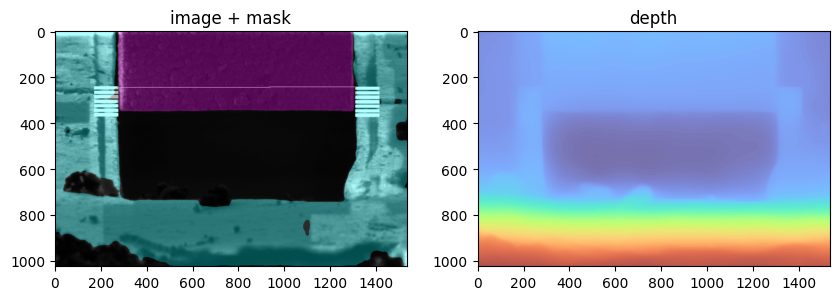

In [7]:
from transformers import pipeline
from datasets import load_dataset
from PIL import Image
import requests
import numpy as np

# load pipe
pipe = pipeline(task = "depth-estimation", model="nielsr/depth-anything-small", device=0)

# load image
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

ds = load_dataset("patrickcleeve/autolamella", "serial-liftout", split="test")

import random
idx = random.randint(0, len(ds)-1)
image = Image.fromarray(np.asarray(ds[idx]["image"]))
mask = np.asarray(ds[idx]["annotation"])

from fibsem.segmentation.utils import decode_segmap_v2

# inference
depth = pipe(image)["depth"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(image, cmap="gray")
ax[0].imshow(decode_segmap_v2(mask), alpha=0.3)
ax[0].set_title("image + mask")
# ax[1].imshow(image, cmap="gray")
ax[1].imshow(depth, alpha=0.7, cmap="turbo")
ax[1].set_title("depth")

plt.show()